In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam

%matplotlib inline

In [425]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")


In [429]:
total = df_india.sum()
total.name = "Total"
pd.DataFrame(total).transpose().style.background_gradient(cmap='summer',axis=1)

,confirmed,recovered,deaths,active
Total,3671,283,99,3289


In [430]:

df_india.style.background_gradient(cmap='summer')

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,635,52,32,551
Tamil Nadu,485,8,3,474
Delhi,445,16,6,423
Kerala,306,50,2,254
Telangana,272,33,11,228
Uttar Pradesh,234,21,2,211
Rajasthan,200,25,1,174
Andhra Pradesh,192,2,1,189
Madhya Pradesh,179,0,11,168


In [431]:
df_india[df_india['deaths'] > 0].style.background_gradient(cmap='autumn')

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,635,52,32,551
Tamil Nadu,485,8,3,474
Delhi,445,16,6,423
Kerala,306,50,2,254
Telangana,272,33,11,228
Uttar Pradesh,234,21,2,211
Rajasthan,200,25,1,174
Andhra Pradesh,192,2,1,189
Madhya Pradesh,179,0,11,168


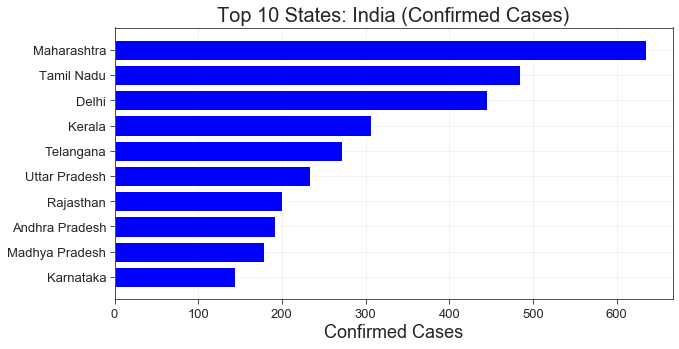

In [433]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[-10:],df_india.sort_values('confirmed')["confirmed"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: India (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_India (Confirmed Cases).png')

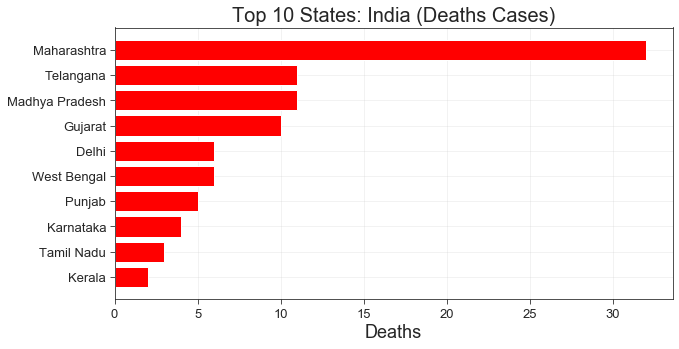

In [434]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('deaths')["deaths"].index[-10:],df_india.sort_values('deaths')["deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: India (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_India (Deaths Cases).png')

In [11]:
df_india.corr().style.background_gradient(cmap='Reds')

,confirmed,recovered,deaths,active
confirmed,1,0.685686,0.671289,0.996227
recovered,0.685686,1,0.59286,0.624278
deaths,0.671289,0.59286,1,0.6313
active,0.996227,0.624278,0.6313,1


In [12]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
df_india["Lat"] = ""
df_india["Long"] = ""
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]

In [16]:
# url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
# state_json = requests.get(url).json()
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=800,width="100%")
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['deaths']/(df_india.iloc[i]['confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

india

+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   |        Andhra Pradesh       |    161    |     1     |    1     |
|   2   | Andaman and Nicobar Islands |     10    |     0     |    0     |
|   3   |      Arunachal Pradesh      |     1     |     0     |    0     |
|   4   |            Assam            |     24    |     0     |    0     |
|   5   |            Bihar            |     30    |     0     |    1     |
|   6   |          Chandigarh         |     18    |     0     |    0     |
|   7   |         Chhattisgarh        |     9     |     3     |    0     |
|   8   |            Delhi            |    445    |     15    |    6     |
|   9   |             Goa             |     7     |     0     |    0     |
|   10  |           Gujarat           |    105    |     14    |    10    |
|   11  |           Harya

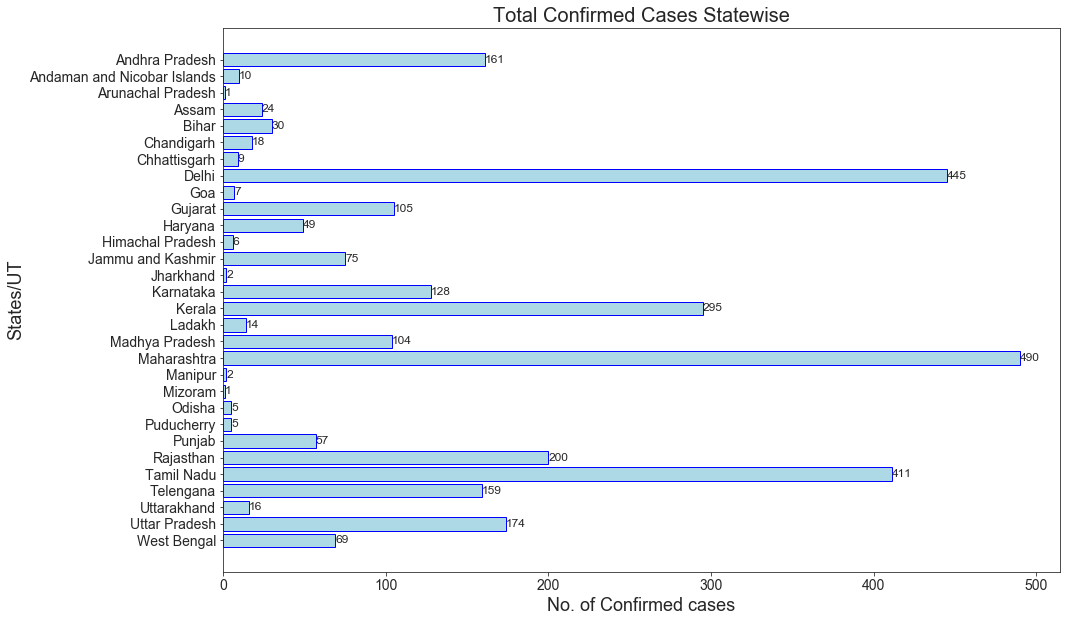

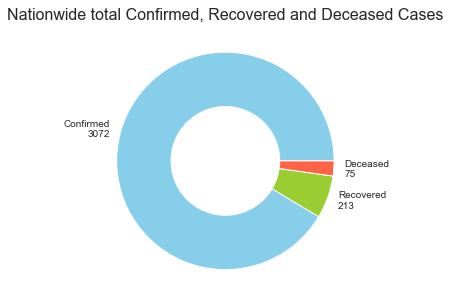

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



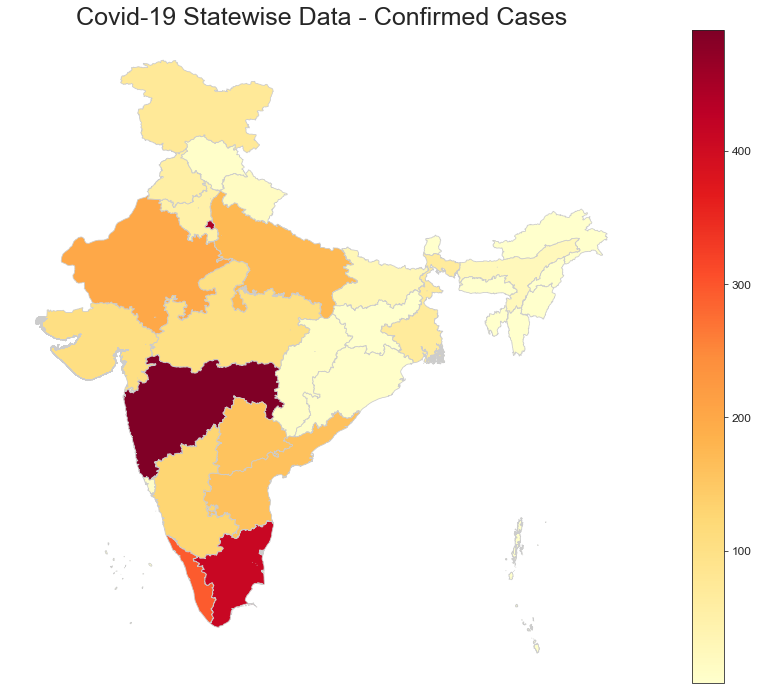

In [435]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
import geopandas as gpd
from prettytable import PrettyTable

# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 

stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

# now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

# pretty table representation
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)

# barplot to show total confirmed cases Statewise 
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show()  

# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()

# read the state wise shapefile of India in a GeoDataFrame and preview it
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
#merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()

In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [443]:
India_covid19 = pd.read_excel('covid_19_india.xlsx', parse_dates=['Date'], dayfirst=True)
print(India_covid19.head())
print(India_covid19.tail())



   Sno       Date      Time State/UnionTerritory ConfirmedIndianNational  \
0    1 2020-01-30  18:00:00               Kerala                       1   
1    2 2020-01-31  18:00:00               Kerala                       1   
2    3 2020-02-01  18:00:00               Kerala                       2   
3    4 2020-02-02  18:00:00               Kerala                       3   
4    5 2020-02-03  18:00:00               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  
     Sno       Date      Time State/UnionTerritory ConfirmedIndianNational  \
643  644 2020-04-04  18:00:00           Tamil Nadu                       -   
644  645 2020-04-04  18:00:00            Telengana       

In [444]:
India_covid19.columns



Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [445]:
India_covid19.drop(["Sno"], axis = 1, inplace = True)
India_covid19.rename(columns = {"State/UnionTerritiry": "States"}, inplace=True)
print(India_covid19.head())
print(India_covid19.tail())



        Date      Time State/UnionTerritory ConfirmedIndianNational  \
0 2020-01-30  18:00:00               Kerala                       1   
1 2020-01-31  18:00:00               Kerala                       1   
2 2020-02-01  18:00:00               Kerala                       2   
3 2020-02-02  18:00:00               Kerala                       3   
4 2020-02-03  18:00:00               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  
          Date      Time State/UnionTerritory ConfirmedIndianNational  \
643 2020-04-04  18:00:00           Tamil Nadu                       -   
644 2020-04-04  18:00:00            Telengana                       -   
645 2020-04-04  18:00:00

In [446]:
#Estimate daily count
India_per_day = India_covid19.groupby(["Date"])["Confirmed"].sum().reset_index().sort_values("Date", ascending = True)
print(India_per_day.head())
print(India_per_day.tail())
print(India_per_day.shape)

        Date  Confirmed
0 2020-01-30          1
1 2020-01-31          1
2 2020-02-01          2
3 2020-02-02          3
4 2020-02-03          3
         Date  Confirmed
61 2020-03-31       1397
62 2020-04-01       1834
63 2020-04-02       2069
64 2020-04-03       2547
65 2020-04-04       3072
(66, 2)


In [447]:
India_per_day.shape[0]

66

In [448]:
India_per_day['Date']=pd.to_datetime(India_per_day.Date,dayfirst=True)
India_daily= India_per_day.groupby(['Date'])['Confirmed'].sum().reset_index().sort_values('Date',ascending=True)
India_daily["day_count"] = np.arange(0, India_daily.shape[0])

daily_infection = India_daily.loc[:, ["day_count", "Confirmed"]]
print(daily_infection.head())
print(daily_infection.tail())



   day_count  Confirmed
0          0          1
1          1          1
2          2          2
3          3          3
4          4          3
    day_count  Confirmed
61         61       1397
62         62       1834
63         63       2069
64         64       2547
65         65       3072


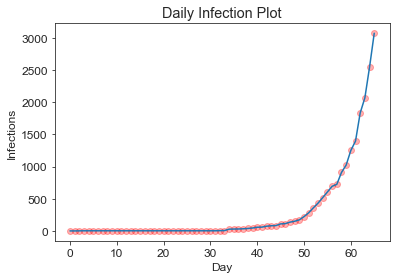

In [449]:
#Infection plot

plt.scatter(daily_infection["day_count"], daily_infection["Confirmed"], alpha=0.3, c="red")
plt.plot(daily_infection["day_count"], daily_infection["Confirmed"])
plt.title("Daily Infection Plot")
plt.xlabel("Day")
plt.ylabel("Infections")
plt.show()

In [450]:
# Taking log of dependent variable
daily_infection["logConfirmed"] = np.log(daily_infection.Confirmed)
daily_infection.head(10)

,day_count,Confirmed,logConfirmed
0,0,1,0.000000
1,1,1,0.000000
2,2,2,0.693147
3,3,3,1.098612
4,4,3,1.098612
5,5,3,1.098612
6,6,3,1.098612
7,7,3,1.098612
8,8,3,1.098612
9,9,3,1.098612


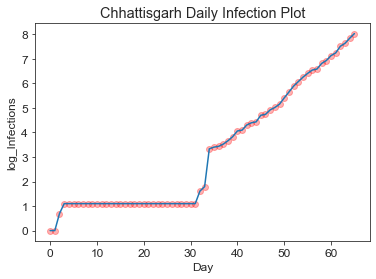

In [451]:
plt.scatter(daily_infection["day_count"], daily_infection["logConfirmed"], alpha=0.3, c="red")
plt.plot(daily_infection["day_count"], daily_infection["logConfirmed"])
plt.title("Chhattisgarh Daily Infection Plot")
plt.xlabel("Day")
plt.ylabel("log_Infections")
plt.show()

In [452]:
#Model fitting

import statsmodels.api as sm

X = daily_infection.day_count
X = sm.add_constant(X)
y = daily_infection.logConfirmed

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [453]:
model = sm.OLS(y, X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:           logConfirmed   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     514.2
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.71e-32
Time:                        04:43:08   Log-Likelihood:                -79.728
No. Observations:                  66   AIC:                             163.5
Df Residuals:                      64   BIC:                             167.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7207      0.200     -3.600      0.0

In [454]:
x0 = np.exp(reg.params[0])
b = np.exp(reg.params[1])
x0, b

(0.48642307694725206, 1.1280494283575615)

In [455]:
t1 = np.arange(India_daily.shape[0])
y = (x0 + b**t1).round()
y

array([  1.00000000e+00,   2.00000000e+00,   2.00000000e+00,
         2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   3.00000000e+00,   3.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   4.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   6.00000000e+00,
         7.00000000e+00,   7.00000000e+00,   8.00000000e+00,
         9.00000000e+00,   1.00000000e+01,   1.20000000e+01,
         1.30000000e+01,   1.50000000e+01,   1.60000000e+01,
         1.90000000e+01,   2.10000000e+01,   2.30000000e+01,
         2.60000000e+01,   3.00000000e+01,   3.30000000e+01,
         3.80000000e+01,   4.20000000e+01,   4.80000000e+01,
         5.40000000e+01,   6.10000000e+01,   6.80000000e+01,
         7.70000000e+01,   8.70000000e+01,   9.80000000e+01,
         1.10000000e+02,   1.24000000e+02,   1.40000000e+02,
         1.58000000e+02,   1.78000000e+02,   2.01000000e+02,
         2.27000000e+02,   2.56000000e+02,   2.89000000e+02,
         3.25000000e+02,

In [456]:
#Actual vs Predicted Dataframe
upto_now = pd.DataFrame({'day_count': t1, "Actual": daily_infection["Confirmed"], "Predicted": y, })
upto_now

,day_count,Actual,Predicted
0,0,1,1.0
1,1,1,2.0
2,2,2,2.0
3,3,3,2.0
4,4,3,2.0
...,...,...,...
61,61,1397,1557.0
62,62,1834,1756.0
63,63,2069,1981.0
64,64,2547,2234.0


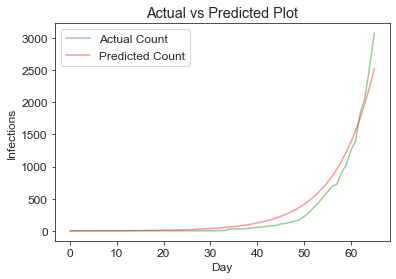

In [457]:
plt.plot(upto_now.day_count, upto_now.Actual, alpha=0.4, c="green")
plt.plot(upto_now.day_count, upto_now.Predicted, alpha=0.4, c="red")

plt.title("Actual vs Predicted Plot")
plt.legend(["Actual Count", "Predicted Count"])
plt.xlabel("Day")
plt.ylabel("Infections")
plt.show()

In [458]:
from sklearn.metrics import mean_squared_error

mean_squared_error(upto_now.Actual, upto_now.Predicted)

14713.015151515152

In [466]:
#Predictions for next two week
India_daily.shape[0] + 14

80

In [467]:
t = np.arange(India_daily.shape[0], India_daily.shape[0] + 14)
t

array([66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [468]:
xt = (x0 + b**t).round()
xt

array([  2843.,   3207.,   3617.,   4080.,   4603.,   5192.,   5857.,
         6607.,   7453.,   8407.,   9483.,  10698.,  12067.,  13612.])

In [469]:
next2weeks = pd.DataFrame({'day_count': t, "Confirmed": xt})
next2weeks

,day_count,Confirmed
0,66,2843.0
1,67,3207.0
2,68,3617.0
3,69,4080.0
4,70,4603.0
5,71,5192.0
6,72,5857.0
7,73,6607.0
8,74,7453.0
9,75,8407.0


In [470]:
X = daily_infection.day_count
y = daily_infection.Confirmed

X1 = next2weeks.day_count
y1 = next2weeks.Confirmed

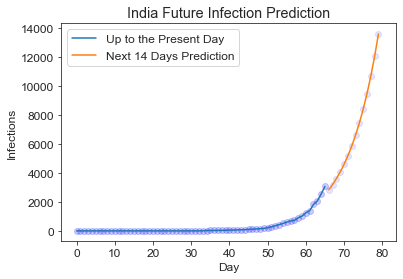

In [471]:
#prediction plot

plt.scatter(X, y, alpha=0.2, c="blue")
plt.scatter(X1, y1, alpha=0.1, c="blue")
plt.plot(X, y)
plt.plot(X1, y1)
plt.title("India Future Infection Prediction")
plt.legend(["Up to the Present Day", "Next 14 Days Prediction"])
plt.xlabel("Day")
plt.ylabel("Infections")
plt.show()